<a href="https://colab.research.google.com/github/Suddha-Abhitej/gett-failed-orders-analysis/blob/main/gett_failed_orders_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Order and Offer Data Analysis**

---



This notebook analyzes order and offer data to identify patterns related to order failures and visualize them geographically using H3 hexagons and Folium.

## Data Loading and Initial Exploration

### Task: Load the datasets and perform initial exploration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')


### Task: Display the first few rows of the orders data.

In [2]:
orders = pd.read_csv("/content/drive/MyDrive/data_orders.csv")
offers = pd.read_csv("/content/drive/MyDrive/data_offers.csv")

In [3]:
orders.head(20)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
5,21:21:23,-0.947011,51.456380,NaN,3000583117054,9,0,NaN
6,07:58:15,-0.955637,51.470372,NaN,3000582791789,9,0,NaN
7,07:53:46,-0.978230,51.454575,NaN,3000582791562,9,0,NaN
8,08:53:01,-1.052298,51.454308,NaN,3000582817606,9,0,NaN
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0


In [19]:
orders.describe()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,hour
count,10716,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000,10716.000000
mean,2025-06-07 12:53:57.914893568,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021,12.395110
min,2025-06-07 00:00:02,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000,0.000000
25%,2025-06-07 07:17:50.249999872,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000,7.000000
50%,2025-06-07 13:33:50.500000,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000,13.000000
75%,2025-06-07 20:36:01.500000,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000,20.000000
max,2025-06-07 23:59:59,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000,23.000000
std,NaN,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963,7.660695


In [62]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [5]:
print("Orders shape:", orders.shape)
print("Offers shape:", offers.shape)

Orders shape: (10716, 8)
Offers shape: (334363, 2)


### Task: Display information about the orders dataframe and check for missing values.

In [6]:
orders.info()
orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


,0
order_datetime,0
origin_longitude,0
origin_latitude,0
m_order_eta,7902
order_gk,0
order_status_key,0
is_driver_assigned_key,0
cancellations_time_in_seconds,3409


### Task: Convert 'order_datetime' to datetime objects and extract the hour and Merge orders and offers dataframes.

In [12]:
orders['order_datetime'] = pd.to_datetime(orders['order_datetime'])
orders['hour'] = orders['order_datetime'].dt.hour

In [13]:
merged = orders.merge(offers, on='order_gk', how='left')


## Distribution of Orders by Failure Reason

### Task: Determine the reason for order failure and visualize the distribution.

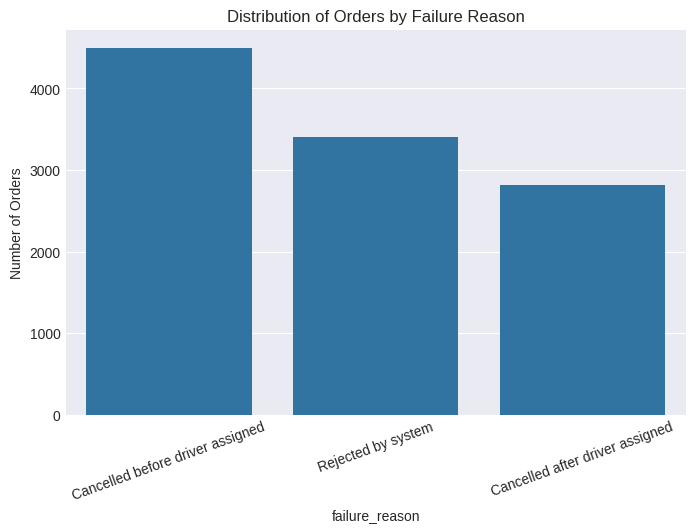

,count
failure_reason,
Cancelled before driver assigned,4496
Rejected by system,3409
Cancelled after driver assigned,2811


In [14]:
def get_failure_reason(row):
    if row['order_status_key'] == 4:
        return 'Cancelled after driver assigned' if row['is_driver_assigned_key'] == 1 else 'Cancelled before driver assigned'
    elif row['order_status_key'] == 9:
        return 'Rejected by system'
    else:
        return 'Other'

orders['failure_reason'] = orders.apply(get_failure_reason, axis=1)

# Plot
failure_counts = orders['failure_reason'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=failure_counts.index, y=failure_counts.values)
plt.title("Distribution of Orders by Failure Reason")
plt.ylabel("Number of Orders")
plt.xticks(rotation=20)
plt.show()

failure_counts


### Task: Display descriptive statistics for the orders data.

In [15]:
rejected_with_driver = orders[
    (orders['order_status_key'] == 9) &
    (orders['is_driver_assigned_key'] == 1)
]
rejected_with_driver.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,failure_reason,hour
1158,2025-06-07 16:49:55,-0.974337,51.465422,418.0,3000631256425,9,1,NaN,Rejected by system,16
6881,2025-06-07 00:44:03,-0.973348,51.453919,60.0,3000630156338,9,1,NaN,Rejected by system,0
7968,2025-06-07 00:12:02,-0.974735,51.454823,298.0,3000600112433,9,1,NaN,Rejected by system,0


## Failed Orders by Hour and Reason

### Task: Visualize failed orders by hour and failure reason.

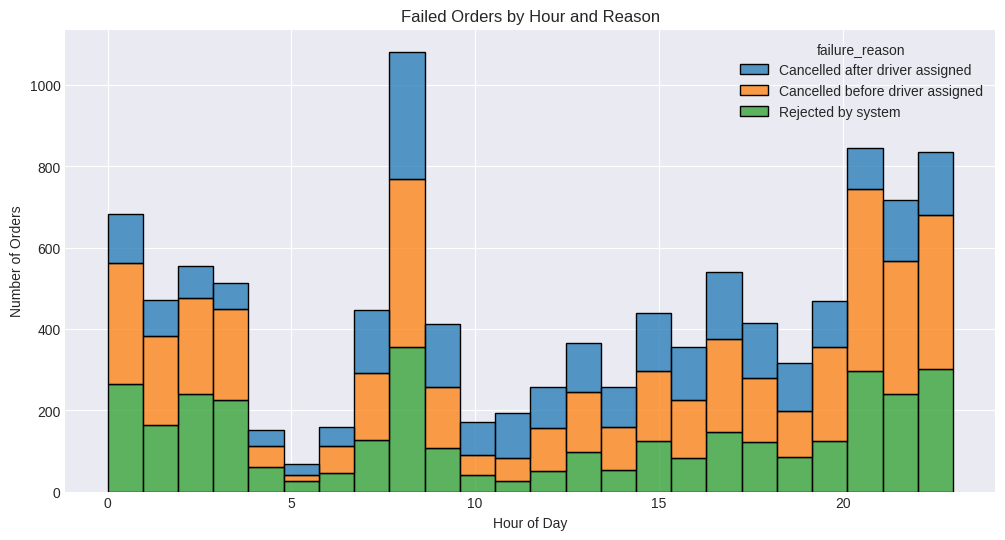

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=orders, x='hour', hue='failure_reason', multiple='stack', bins=24)
plt.title("Failed Orders by Hour and Reason")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()

## Average Time to Cancellation With vs Without Driver, by Hour

### Task: Analyze and visualize the average cancellation time based on driver assignment and hour.

In [22]:
orders_clean = orders[orders['cancellations_time_in_seconds'] <= 3600]


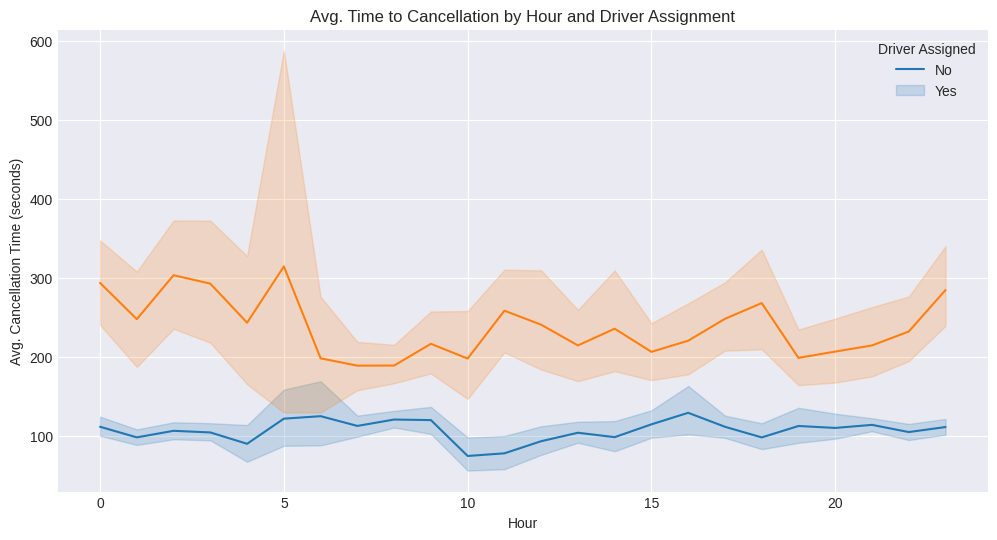

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=orders_clean,
    x='hour',
    y='cancellations_time_in_seconds',
    hue='is_driver_assigned_key'
)
plt.title("Avg. Time to Cancellation by Hour and Driver Assignment")
plt.ylabel("Avg. Cancellation Time (seconds)")
plt.xlabel("Hour")
plt.legend(title='Driver Assigned', labels=['No', 'Yes'])
plt.show()


## Distribution of Average ETA by Hour

### Task: Visualize the distribution of estimated time of arrival (ETA) by hour.

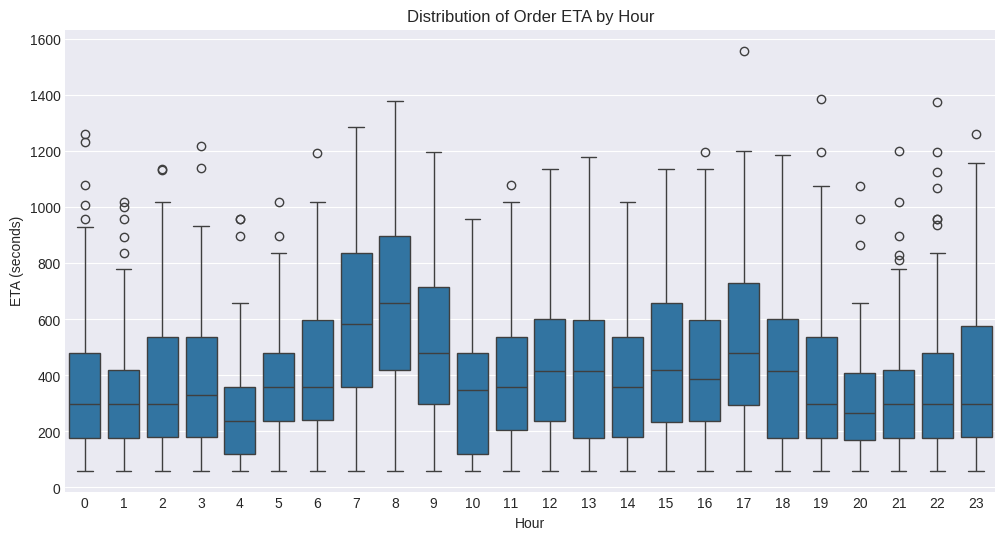

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=orders, x='hour', y='m_order_eta')
plt.title("Distribution of Order ETA by Hour")
plt.ylabel("ETA (seconds)")
plt.xlabel("Hour")
plt.show()


In [28]:
!pip install h3 folium
import folium
import h3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.6 MB/s eta 0:00:00


In [33]:
!pip install h3


## Calculate h3 hexagons

### Subtask:
Calculate the H3 hexagon (at resolution 8) for each order's origin location.


In [41]:
import h3
print(dir(h3))

['H3BaseException', 'H3CellInvalidError', 'H3DirEdgeInvalidError', 'H3DomainError', 'H3DuplicateInputError', 'H3FailedError', 'H3GridNavigationError', 'H3LatLngDomainError', 'H3MemoryAllocError', 'H3MemoryBoundsError', 'H3MemoryError', 'H3NotNeighborsError', 'H3OptionInvalidError', 'H3PentagonError', 'H3ResDomainError', 'H3ResMismatchError', 'H3Shape', 'H3UndirEdgeInvalidError', 'H3ValueError', 'H3VertexInvalidError', 'LatLngMultiPoly', 'LatLngPoly', 'Literal', 'UnknownH3ErrorCode', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_cy', '_h3shape', '_version', 'api', 'are_neighbor_cells', 'average_hexagon_area', 'average_hexagon_edge_length', 'cell_area', 'cell_to_boundary', 'cell_to_center_child', 'cell_to_child_pos', 'cell_to_children', 'cell_to_children_size', 'cell_to_latlng', 'cell_to_local_ij', 'cell_to_parent', 'cell_to_vertex', 'cell_to_vertexes', 'cells_to_directed_edge', 'cells_to_geo', 'cell

In [42]:
orders['hex8'] = orders.apply(
    lambda row: h3.latlng_to_cell(row['origin_latitude'], row['origin_longitude'], 8),
    axis=1
)

## Count orders per hexagon

### Subtask:
Count the number of orders within each H3 hexagon.


**Reasoning**:
Count the number of orders for each hexagon.



In [43]:
orders_per_hexagon = orders['hex8'].value_counts()

## Identify top hexagons

### Subtask:
Determine the minimum number of orders a hexagon must contain to be within the top 80% of orders.


**Reasoning**:
Calculate the total number of orders, the target number of orders (80% of total), sort the hexagon order counts, calculate the cumulative sum, and find the minimum orders for the top 80% of hexagons.



In [45]:
total_orders = orders_per_hexagon.sum()
target_orders = total_orders * 0.80
orders_per_hexagon_sorted = orders_per_hexagon.sort_values(ascending=False)
cumulative_orders = orders_per_hexagon_sorted.cumsum()
min_orders_for_80_percent = orders_per_hexagon_sorted[cumulative_orders >= target_orders].min()

print(f"Total orders: {total_orders}")
print(f"Target orders (80%): {target_orders}")
print(f"Minimum orders per hexagon to be in the top 80%: {min_orders_for_80_percent}")

Total orders: 10716
Target orders (80%): 8572.800000000001
Minimum orders per hexagon to be in the top 80%: 1


## Filter for top hexagons

### Subtask:
Filter the orders DataFrame to include only orders within the identified top hexagons.


**Reasoning**:
Create a list of hexagon IDs that have at least `min_orders_for_80_percent` orders and then filter the orders DataFrame to include only orders within these top hexagons.



In [46]:
top_hexagons = orders_per_hexagon[orders_per_hexagon >= min_orders_for_80_percent].index.tolist()
top_hex_orders = orders[orders['hex8'].isin(top_hexagons)]
display(top_hex_orders.head())

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,failure_reason,hour,hex8
0,2025-06-07 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,Cancelled after driver assigned,18,88195d2b03fffff
1,2025-06-07 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,Cancelled before driver assigned,20,88195d2b19fffff
2,2025-06-07 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,Cancelled after driver assigned,12,88195d2b1dfffff
3,2025-06-07 13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,Cancelled after driver assigned,13,88195d7497fffff
4,2025-06-07 21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,Rejected by system,21,88195d2b1dfffff


## Count failed orders per hexagon

### Subtask:
Within the top hexagons, count the number of failed orders.


**Reasoning**:
Filter the top hexagons DataFrame to include only failed orders and then group by hexagon to count the failures.



In [47]:
failed_orders_in_top_hex = top_hex_orders[
    (top_hex_orders['order_status_key'] == 4) | (top_hex_orders['order_status_key'] == 9)
]

failed_counts_per_hexagon = failed_orders_in_top_hex['hex8'].value_counts()

display(failed_counts_per_hexagon.head())

,count
hex8,
88195d2b1dfffff,1497
88195d2b1bfffff,870
88195d2b15fffff,774
88195d2b11fffff,707
88195d2b19fffff,667


## Prepare data for visualization

### Subtask:
Format the data for visualization with Folium, including hexagon boundaries and the count of failed orders.


**Reasoning**:
Format the failed counts per hexagon data for visualization by converting the Series to a DataFrame, resetting the index, renaming columns, and adding hexagon boundaries.



In [49]:
print(dir(h3))

['H3BaseException', 'H3CellInvalidError', 'H3DirEdgeInvalidError', 'H3DomainError', 'H3DuplicateInputError', 'H3FailedError', 'H3GridNavigationError', 'H3LatLngDomainError', 'H3MemoryAllocError', 'H3MemoryBoundsError', 'H3MemoryError', 'H3NotNeighborsError', 'H3OptionInvalidError', 'H3PentagonError', 'H3ResDomainError', 'H3ResMismatchError', 'H3Shape', 'H3UndirEdgeInvalidError', 'H3ValueError', 'H3VertexInvalidError', 'LatLngMultiPoly', 'LatLngPoly', 'Literal', 'UnknownH3ErrorCode', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_cy', '_h3shape', '_version', 'api', 'are_neighbor_cells', 'average_hexagon_area', 'average_hexagon_edge_length', 'cell_area', 'cell_to_boundary', 'cell_to_center_child', 'cell_to_child_pos', 'cell_to_children', 'cell_to_children_size', 'cell_to_latlng', 'cell_to_local_ij', 'cell_to_parent', 'cell_to_vertex', 'cell_to_vertexes', 'cells_to_directed_edge', 'cells_to_geo', 'cell

**Reasoning**:
Based on the output of `dir(h3)`, the function to get the hexagon boundary is `cell_to_boundary`. I will use this function to get the hexagon boundaries for each hex_id.



In [50]:
failed_counts_df = failed_counts_per_hexagon.reset_index()
failed_counts_df.columns = ['hex_id', 'failed_order_count']

def get_hexagon_boundary(hex_id):
    # The function is cell_to_boundary, not h3_to_geo_boundary
    return h3.cell_to_boundary(hex_id, geo_json=True)

failed_counts_df['geometry'] = failed_counts_df['hex_id'].apply(get_hexagon_boundary)

display(failed_counts_df.head())

TypeError: cell_to_boundary() got an unexpected keyword argument 'geo_json'

**Reasoning**:
The error message indicates that the `cell_to_boundary` function does not accept the `geo_json=True` argument. I will remove this argument and call the function without it.



In [51]:
failed_counts_df = failed_counts_per_hexagon.reset_index()
failed_counts_df.columns = ['hex_id', 'failed_order_count']

def get_hexagon_boundary(hex_id):
    # Removed geo_json=True as it caused a TypeError
    return h3.cell_to_boundary(hex_id)

failed_counts_df['geometry'] = failed_counts_df['hex_id'].apply(get_hexagon_boundary)

display(failed_counts_df.head())

,hex_id,failed_order_count,geometry
0,88195d2b1dfffff,1497,"((51.46233424112638, -0.9674195894273443), (51..."
1,88195d2b1bfffff,870,"((51.45257385379414, -0.9507230105639715), (51..."
2,88195d2b15fffff,774,"((51.45658471409391, -0.9753174349705687), (51..."
3,88195d2b11fffff,707,"((51.45457984273564, -0.9630191652468647), (51..."
4,88195d2b19fffff,667,"((51.46032841933335, -0.955121170732165), (51...."


## Visualize hexagons

### Subtask:
Create a Folium map centered around the order locations and add the top hexagons, colored by the number of failed orders.


In [61]:
from folium.plugins import HeatMap

mean_latitude = orders['origin_latitude'].mean()
mean_longitude = orders['origin_longitude'].mean()

order_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=12)

# Create a colormap
max_failed_orders = failed_counts_df['failed_order_count'].max()
color_scale = folium.LinearColormap(['yellow', 'red'], vmin=0, vmax=max_failed_orders)

# Add hexagon layers (optional, can be removed if only heatmap is desired)
for index, row in failed_counts_df.iterrows():
    hexagon = row['geometry']
    failed_count = row['failed_order_count']
    hex_id = row['hex_id']

    # Create a GeoJson object for the hexagon
    geo_json = {
        "type": "Polygon",
        "coordinates": [[list(coord) for coord in hexagon]]
    }

    # Add the hexagon to the map with color based on failed_count
    folium.GeoJson(
        geo_json,
        style_function=lambda feature, count=failed_count: {
            'fillColor': color_scale(count),
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.7
        },
        tooltip=f"Hex ID: {hex_id}<br>Failed Orders: {failed_count}"
    ).add_to(order_map)


# Add a heatmap layer for failed orders
# Need to get the lat/lng for each failed order in the top hexagons
failed_orders_locations = failed_orders_in_top_hex[['origin_latitude', 'origin_longitude']].values.tolist()

HeatMap(failed_orders_locations, radius=15).add_to(order_map) # Increased radius


display(order_map)